# Common Name - Evaluation code
Author: 

In [1]:
%matplotlib inline
import sqlite3
import pprint
import pandas as pd
#import geopandas as gpd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 100)
from IPython.display import Image
import repo_functions as functions
from pygbif import occurrences
import matplotlib.pyplot as plt
from datetime import datetime
import os
t1 = datetime.now()

### General Setup  
Fill out the next cell.

In [2]:
eval_id = ''
gap_id = ''
summary_name = '' # a short, memorable name to use for file names etc.
codeDir = ''
inDir = ''
outDir = ''
request_id = ''
filter_id = ''

In [3]:
notebook_name = gap_id + eval_id + ".ipynb"
eval_db = outDir + gap_id + eval_id + '.sqlite'
orw_db = '' # path to parameters.sqlite within occurrence record wrangler repo
connection = sqlite3.connect(orw_db)

orw_id = connection.execute("SELECT species_id FROM species_concepts WHERE gap_id = ?;", (gap_id,)).fetchone()[0]
occ_db = '#########/{0}{1}{2}.sqlite'.format(orw_id, request_id, filter_id) # Path to occurrence db created from occurrence records wrangler db
parameters_db = '/users/nmtarr/code/GAP-range-evaluation/evaluations.sqlite' # path to evaluations db

common_name = connection.execute("SELECT common_name FROM species_concepts WHERE gap_id = ?;", (gap_id,)).fetchone()[0]
sci_name = connection.execute("SELECT scientific_name FROM species_concepts WHERE gap_id = ?;", (gap_id,)).fetchone()[0]
shucs_loc = '/users/nmtarr/data/SHUCS'

## Evaluation Parameters

Evaluation parameters need to be set and justified in the cells within this section.  Values that are entered here will be used to update cells within the 'evaluations' table stored in evaluations.sqlite. The decisions about what values to use are primarily documented here, not in the evaluations database.

Note that the evaluation ID and species' GAP code are set in the cell above, not below.  I am proposing that evaluation parameter sets also be documented as unique entities in a database (i.e, evaluations.sqlite).  Each evaluation can be given a unique id that can be used in documentation, file naming, and for the names of the columns that will be added to the GAP range table to record the results of the evaluation.  In this example, the evaluation_id is __tws2019__.

### Filter Sets

In [4]:
filter_sets = "{0}, {1}".format(request_id, filter_id)

### Years
Justification: A fair number of records exist for this species, so I chose 2 old years.

In [5]:
years = "2001, 2002"

### Months
Justification:

In [6]:
months = "5,6,7"

### Evaluation Method
Justification: The restrictive nature of "proportion in polygon" is a good fit for the demonstration of the framework.

In [7]:
method = "proportion in polygon"

#### Minimum Count
Justification: This species is fairly easy to identify, but misidentification could be possible.

In [8]:
min_count = 1

#### Error Tolerance
Justification:

In [9]:
error_tolerance = 40

### Credits

In [10]:
creator = ""
date = datetime.now()

### Justification

In [11]:
justification = "See " + notebook_name

### Notes

In [12]:
notes = """"""

### Write to evaluations.sqlite

In [13]:
connjup = sqlite3.connect(parameters_db)
cursorjup = connjup.cursor()

# Make a row for species-evaluation
sqlrow = """INSERT OR IGNORE INTO evaluations ("evaluation_id", "species_id") VALUES (?, ?);"""
vals = [eval_id, gap_id]
cursorjup.execute(sqlrow, vals)

# Filter sets
sqlfilters = """UPDATE evaluations SET filter_sets=? WHERE evaluation_id=? AND species_id=?;"""
vals = [filter_sets, eval_id, gap_id]
cursorjup.execute(sqlfilters, vals)

# Years
sqlyear = """UPDATE evaluations SET years=? WHERE evaluation_id=? AND species_id=?;"""
vals = [years, eval_id, gap_id]
cursorjup.execute(sqlyear, vals)

# Months
sqlmonths = """UPDATE evaluations SET months=? WHERE evaluation_id=? AND species_id=?;"""
vals = [months, eval_id, gap_id]
cursorjup.execute(sqlmonths, vals)

# Evaluation Method
sqlmethod = """UPDATE evaluations SET method=? WHERE evaluation_id=? AND species_id=?"""
vals = [method, eval_id, gap_id]
cursorjup.execute(sqlmethod, vals)

# Minimum Count
sqlmin = """UPDATE evaluations SET min_count=? WHERE evaluation_id=? AND species_id=?"""
vals = [min_count, eval_id, gap_id]
cursorjup.execute(sqlmin, vals)

# Error Tolerance
sqltolerance = """UPDATE evaluations SET error_tolerance=? WHERE evaluation_id=? AND species_id=?"""
vals = [error_tolerance, eval_id, gap_id]
cursorjup.execute(sqltolerance, vals)

# Justification
sqljust = """UPDATE evaluations SET justification=? WHERE evaluation_id=? AND species_id=?"""
vals = [justification, eval_id, gap_id]
cursorjup.execute(sqljust, vals)

# Credits
sqlcreator = """UPDATE evaluations SET creator=? WHERE evaluation_id=? AND species_id=?"""
vals = [creator, eval_id, gap_id]
cursorjup.execute(sqlcreator, vals)

# Notes
sqlnotes = """UPDATE evaluations SET notes=? WHERE evaluation_id=? AND species_id=?"""
vals = [notes, eval_id, gap_id]
cursorjup.execute(sqlnotes, vals)

sqldate= """UPDATE evaluations SET date=? WHERE evaluation_id=? AND species_id=?"""
vals = [date, eval_id, gap_id]
cursorjup.execute(sqldate, vals)

connjup.commit()

### Evaluation Parameters
Display the record that was just written.

In [14]:
df1 = pd.read_sql_query(sql="SELECT * FROM evaluations WHERE evaluation_id='{0}' AND species_id='{1}'".format(eval_id, gap_id), con=connjup)
print(df1.loc[0])

evaluation_id                                                          tws2019
species_id                                                              bwewax
years                                                               2001, 2002
months                                                                   5,6,7
min_count                                                                    1
error_tolerance                                                             40
method                                                   proportion in polygon
filter_sets                                                    GBIFr14, GBIFf4
justification                                          See bwewaxtws2019.ipynb
creator                                                            Nathan Tarr
date                                                2019-08-21 22:44:44.402726
notes              For development of TWS2019 evaluation.  Note that specie...
Name: 0, dtype: object


### Request Filter Set

In [15]:
filterconn = sqlite3.connect(orw_db)
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id='{0}'".format(request_id), con=filterconn)
print(df2.loc[0])

request_id                                                          GBIFr14
source                                                                 GBIF
lat_range                                                             27,41
lon_range                                                           -91,-75
years_range                                                       2000,2002
months_range                                                           1,12
geoissue                                                              False
coordinate                                                             True
continent                                                              None
creator                                                             N. Tarr
notes           For evaluating 2001 GAP range maps.  Are the years correct?
Name: 0, dtype: object


### Post Request Filter Set

In [16]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(filter_id), con=filterconn)
print(df2.loc[0])
filterconn.close()

filter_id                                                                          GBIFf4
dataset                                                                              GBIF
collection_codes_omit                                                                None
institutions_omit                                                                    None
has_coordinate_uncertainty                                                              0
max_coordinate_uncertainty                                                           5000
bases_omit                                            PRESERVED_SPECIMEN, FOSSIL_SPECIMEN
protocols_omit                                                                       None
sampling_protocols_omit                                                              None
issues_omit                   GEODETIC_DATUM_INVALID, INDIVIDUAL_COUNT_INVALID, MULTIM...
creator                                                                           N. Tarr
notes     

# Occurrence Record Retrieval and Display
This repo is dependent upon the occorrence-records-wrangler repo because occurrence data is retrieved here from sqlite occurrence databases generated with the records wrangler repo.  In this section, a connection is established and records are filtered according to the evaluation parameters.  Keep in mind that the occurrence record databases were themselves created with filters so you have to be mindful of how parameters set here compare to ones set there. For example, dates of records included will be determined by whichever process had a more restrictive date range. 

The first step in using occurrence records to evaluate GAP range is to build a database to hold the GAP 12 digit HUCs, range for the species, and suitable occurrence records.  The database is also suitable for performing the necessary spatial queries.  The GAP range is retrieved from ScienceBase and the HUCs would be too if they were available as a shapefile.  

In [17]:
functions.make_evaluation_db(eval_db=eval_db, gap_id=gap_id, shucLoc=shucs_loc, inDir=inDir, outDir=outDir)

Copy records to the evaluation database, filtering out records from months or years that aren't wanted.

In [18]:
# Connect to the evaluation occurrence records database
cursor, evconn = functions.spatialite(eval_db)

# Attach occurrence database
cursor.execute("ATTACH DATABASE ? AS occs;", (occ_db,))

# Create table of occurrences that fit within evaluation parameters
years = tuple([x.strip() for x in years.split(',')])
months = tuple([x.strip().zfill(2) for x in months.split(',')])
cursor.execute("""CREATE TABLE evaluation_occurrences AS 
                   SELECT * FROM occs.occurrences 
                   WHERE STRFTIME('%Y', OccurrenceDate) IN {0} 
                       AND STRFTIME('%m', OccurrenceDate) IN {1};""".format(years, months))

# Export occurrence circles as a shapefile (all seasons)
cursor.execute("""SELECT RecoverGeometryColumn('evaluation_occurrences', 'circle_wgs84', 
                  4326, 'POLYGON', 'XY');""")

sql = """SELECT ExportSHP('evaluation_occurrences', 'circle_wgs84', ?, 'utf-8');"""
subs = outDir + summary_name + "_circles"
cursor.execute(sql, (subs,))

# Export occurrence 'points' as a shapefile (all seasons)
cursor.execute("""SELECT RecoverGeometryColumn('evaluation_occurrences', 'geom_xy4326', 
                  4326, 'POINT', 'XY');""")
subs = outDir + summary_name + "_points"
cursor.execute("""SELECT ExportSHP('evaluation_occurrences', 'geom_xy4326', ?, 'utf-8');""", (subs,))

# Close db
evconn.commit()
evconn.close()
del cursor

### Display Occurrence Points and GAP Range Map
A presence shapefile must be created for display because the sciencebase range shapefiles are seasonal, which is not the focus here.

In [19]:
gap_range = functions.download_GAP_range_CONUS2001v1(gap_id, inDir)

downloading https://www.sciencebase.gov/catalog/file/get/59f5ebb4e4b063d5d307e0d1?f=__disk__1c%2F00%2F75%2F1c00755f339c97bafe6c9d1c69ee14cef5326d7c to /users/nmtarr/documents/GAP_Ranges/inputs/bWEWAx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5ebb4e4b063d5d307e0d1?f=__disk__7c%2F1d%2Fc7%2F7c1dc7208c25d4ed06614642f32dbac70c2aa2d5 to /users/nmtarr/documents/GAP_Ranges/inputs/bWEWAx_CONUS_Range_2001v1.xml


Display occurrence records over GAP range

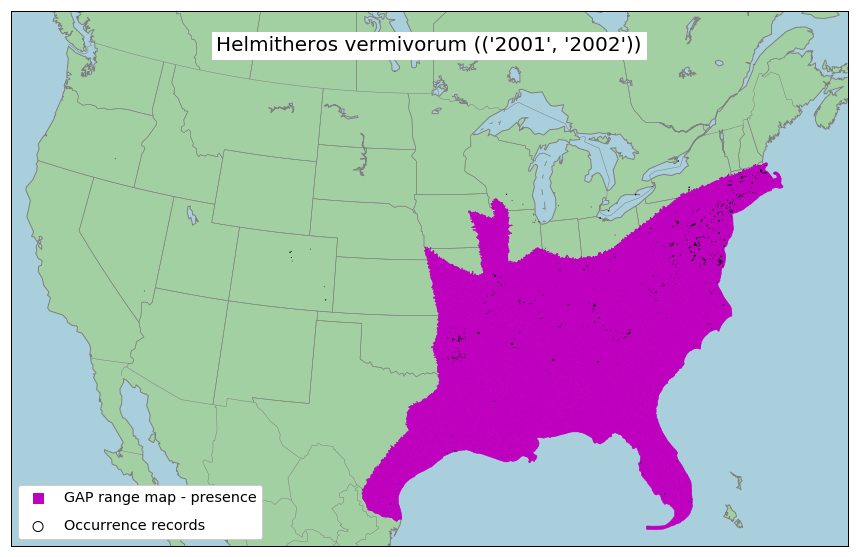

In [33]:

gap_range2 = "{0}{1}_presence_4326".format(outDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP range map - presence',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'm',
        'fillcolor': 'm', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
title="{1} ({0})".format(years, sci_name)
functions.MapShapefilePolygons(map_these=[shp1, shp2], title=title)


# GAP Known Range Data Evaluation
With all the data in a sqlite database with spatialite capabilities, we can perform the evaluation.

In [21]:
functions.evaluate_GAP_range(eval_id=eval_id, gap_id=gap_id, eval_db=eval_db,
                             outDir=outDir, codeDir=codeDir)

In [22]:
connr = sqlite3.connect(eval_db)
df4 = pd.read_sql_query(sql="SELECT strHUC12RNG AS HUC12RNG, "
                                    "intGAPOrigin AS Origin, intGAPPresence AS Presence, "
                                    "intGAPReproduction AS Reproduction,"
                                    "intGAPSeason AS Season, eval_cnt, eval, "
                                    "validated_presence AS validated_pres FROM sp_range WHERE eval_cnt >=0", con=connr)
df4.set_index(["HUC12RNG"], inplace=True)
print("Tabular results of the evaluation")
print(df4)

Tabular results of the evaluation
              Origin  Presence  Reproduction  Season  eval_cnt  eval  validated_pres
HUC12RNG                                                                            
110100080206       1         1             1       4         1     1               1
60102020401        1         1             1       4         1     1               1
11000050604        1         1             1       4         1     1               1
20700090701        1         1             1       4         1     1               1
20600060301        1         1             1       4         1     1               1
20801090102        1         1             1       4         1     1               1
20700100306        1         1             1       4         1     1               1
20403030101        1         1             1       4         1     1               1
20403030502        1         1             1       4         2     1               1
20600060103        1         1 

Mapped results of the evaluation.


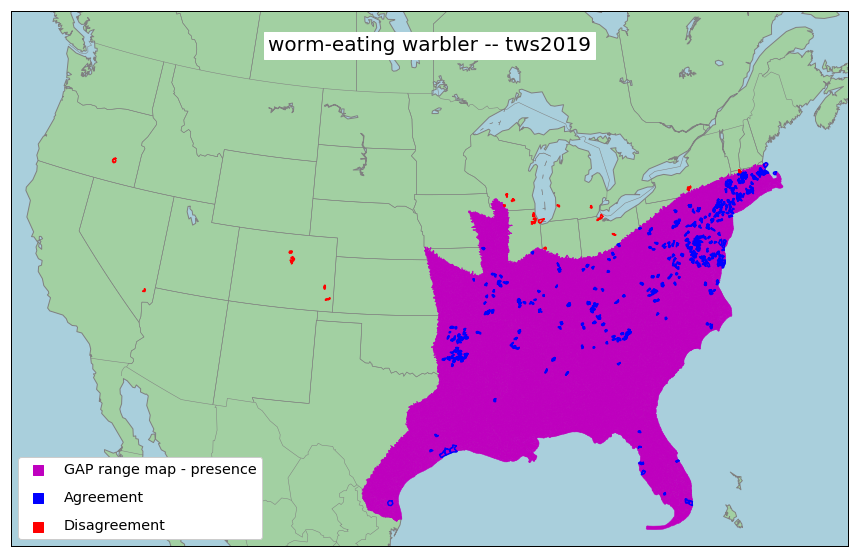

In [35]:
print("Mapped results of the evaluation.")
shp3 = {'file': '{0}{1}_eval'.format(outDir, gap_id), 'column': 'eval',
        'alias': 'eval', 'column_colors': {1: 'b', 0: 'r'}, 
        'value_alias': {1:'Agreement', 0:'Disagreement'}, 'drawbounds': False, 
        'marker': "s"}
title="{0} -- {1}".format(common_name, eval_id)
functions.MapShapefilePolygons(map_these=[shp1, shp3], title=title)

In [24]:
dups0 = connr.execute("SELECT COUNT(occ_id) FROM evaluation_occurrences GROUP BY geom_xy4326, occurrenceDate;").fetchall()
dups1 = [x[0] for x in dups0]
dups2 = [x for x in dups1 if x > 1]
print(str(len(dups2)) + ' records were duplicates based on xy coordinate and date-time')

88 records were duplicates based on xy coordinate and date-time


After occurrence circles are attributed to HUCs, the results can be recorded in the species' range map table in terms of whether the two data sets agreed and whether they validate the GAP range data for any HUCs. For each evaluation, a column is added for 1) how many records could be attributed to each huc and 2) whether there is agreement at that huc (1 for yes, 0 for no, 'None' for no data for that huc) and 3) whether the GAP range has been validated by the evaluation.

# Summary of Results

### How many records were available in the occurrence database?

In [25]:
count = connr.execute("SELECT COUNT(occ_id) FROM evaluation_occurrences;").fetchone()[0]
print(str(count) + " occurence records were suitable for this evaluation of the range.")

1117 occurence records were suitable for this evaluation of the range.


### How many of the records were attributable to a HUC?

In [26]:
hucable = connr.execute("SELECT SUM(eval_cnt) FROM sp_range WHERE eval_cnt >=0").fetchall()[0]
print(str(hucable[0]) + " records were attributable to a HUC.")

1007 records were attributable to a HUC.


### How many hucs had records attributed to them?

In [27]:
containers = connr.execute("SELECT COUNT(eval_cnt) FROM sp_range WHERE eval_cnt >=0").fetchall()[0]
print(str(containers[0]) + " HUCs 'contained' records.")

428 HUCs 'contained' records.


### How many records were not used because of the minimum count?

In [28]:
ones = connr.execute("SELECT SUM(eval_cnt) FROM sp_range WHERE eval_cnt < ?", (min_count,)).fetchall()[0]
if ones[0] != None:
    print(str(ones[0]) + " HUCs had occurrences but were not validated because they didn't meet the minimum.")
else:
    print("None")

None


### How many HUCs were validated?

In [29]:
validated = connr.execute("SELECT COUNT(validated_presence) FROM sp_range WHERE eval = 1").fetchall()[0]
print(str(validated[0]) + " HUCs were validated.")

404 HUCs were validated.


### How many HUCs did GAP appear to omit?

In [30]:
missed = connr.execute("SELECT COUNT(eval) FROM sp_range WHERE eval = 0".format(eval_id)).fetchall()[0]
print(str(missed[0]) + " HUCs were missed.")

24 HUCs were missed.


### What was the maximum number of occurrences attributable to a single HUC?

In [31]:
maxi = connr.execute("SELECT MAX(eval_cnt) FROM sp_range").fetchall()[0]
print("The maximum number of records attributed to a HUC was " + str(maxi[0]))

The maximum number of records attributed to a HUC was 21


### Runtime

In [32]:
t2 = datetime.now()
print(t2 - t1)

15:43:49.144810


# Next Steps
This is just a starting point that needs scrutiny.  It is currently hard-coded for a single species, so deploying it would require redesigning to accomodate large numbers of species, multiple users, many more occurrence records, optimal methods for evaluation and range delineation among other things.  